In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## For integration we will use the scipy.integrate library. Refer to the documentation at: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

### To compute an approximation of an integral, use the quad function where the inputs are the function and the bounds of integration 

In [106]:
integral = integrate.quad(lambda x: 1/x, 1, 2)

In [108]:
#The output is a tuple=(value_of_integral, upper bound on error)
print(integral)

(0.6931471805599454, 7.695479593116622e-15)


### Note that we are computing the integral of 1/x which is the function ln(x). To see the accuracy of the integration we can use the cumtrapz method which computes the cumulative integration of a certain function. 

In [114]:
x = np.arange(1, 10, 0.01)
f = lambda x: 1/x
y = f(x)
cum = integrate.cumtrapz(y, x, initial=0.1)

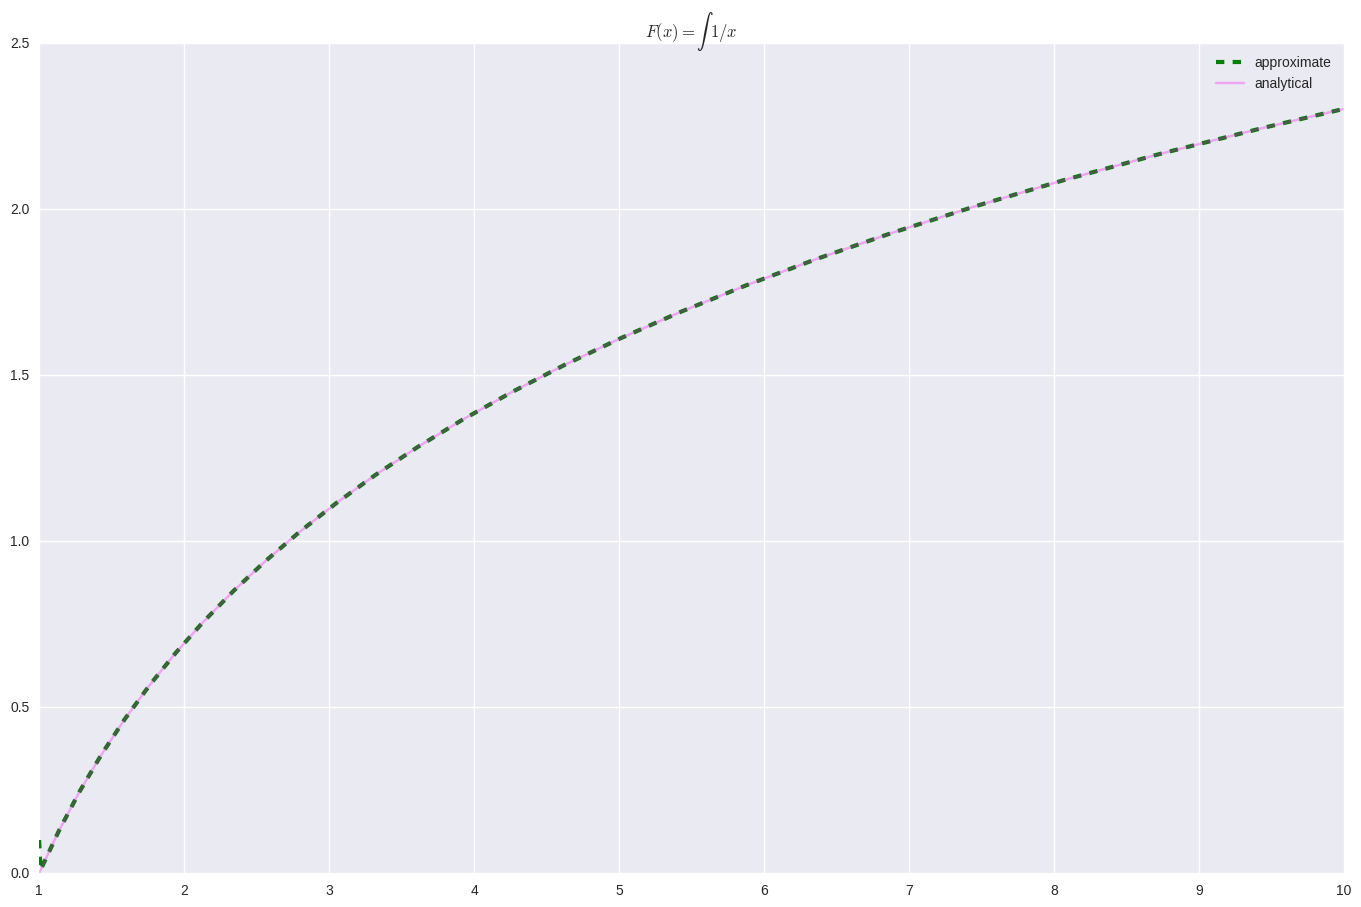

In [115]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10), dpi=100)
plt.plot(x, cum,'--',color='green', alpha=1, lw=3, label='approximate')
plt.plot(x, np.log(x), color='magenta', alpha=0.3, label='analytical')
plt.title("$F(x) = \int \; 1/x$")
plt.legend()
plt.show()

In [116]:
error = abs(cum-np.log(x))
np.mean(error)

0.00011860643216036509

### As we can see, the error is miniscule for the choice of step size. Recall that the trapezoid method has O(h^2) error. So as we decrease the step-size, the error should improve by order of h^2.

## Gaussian Standard Normal CDF 

In [140]:
f = lambda x: 1/(np.sqrt(2*np.pi))*np.exp(-x**2)
x = np.arange(-2,2,0.0001)
y = f(x)

In [144]:
cum = integrate.cumtrapz(y, x)
analytical = norm.cdf(x)

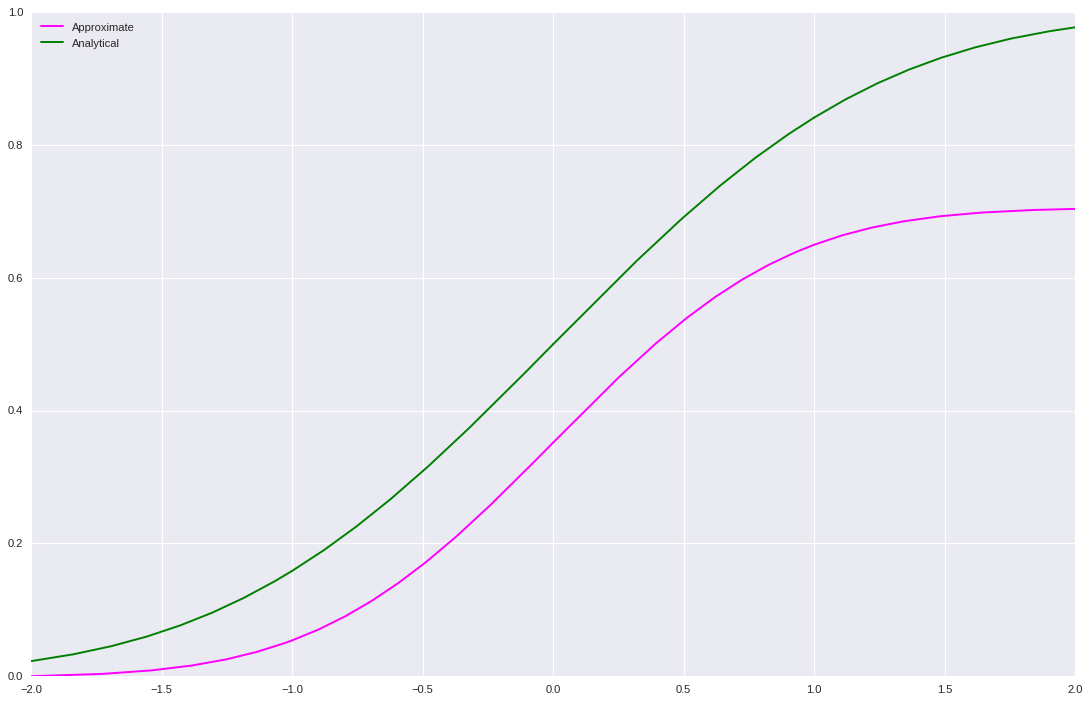

In [142]:
from scipy.stats import norm
plt.figure(figsize=(15,10))
plt.plot(x[1::], cum, label='Approximate',color='magenta')
plt.plot(x, analytical, label='Analytical',color='green')
plt.legend(loc='best')
plt.show()

In [146]:
error = np.mean(cum-analytical[1::])

In [147]:
error

-0.14810043849391422